In [19]:
import numpy as np
import matplotlib.pyplot as plt

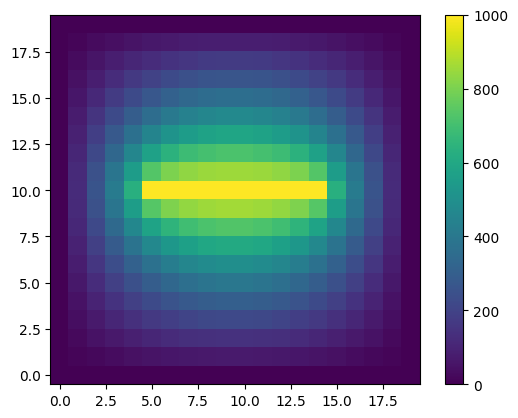

In [26]:
class PotentialGrid:
    def __init__(self, size=100, voltage=1000):
        self.grid = np.zeros((size, size))
        self.size = size

        # setup the stick in the middle of the grid
        self.voltage_stick = np.zeros_like(self.grid, dtype=bool)
        self.voltage_stick[int(size / 2), int(size/4):(int(size/4) + 2 * int(size/4))] = True

        # setup the bounds$
        self.bounds = np.zeros_like(self.grid, dtype=bool)
        self.bounds[0, ::] = True
        self.bounds[-1, ::] = True
        self.bounds[::, 0] = True
        self.bounds[::, -1] = True

        # update our grid with the bounds and the stick
        self.grid[self.voltage_stick] = voltage
        self.grid[self.bounds] = 0

        # set an update_mask of position we should not update
        self.update_mask = np.ones_like(self.grid, dtype=bool)
        self.update_mask[self.voltage_stick] = False
        self.update_mask[self.bounds] = False

    def simulate_grid(self, max_iterations=10000, threshhold=10**-3, w=1):
        for i in range(max_iterations):
            # create a copy of the innter grid (excluding the bounds)
            inner_array = np.zeros_like(self.grid)
            inner_array[1:-1, 1:-1] = np.reshape(self.grid[~self.bounds], (self.size -2, self.size-2))
            #self.visualize_grid(inner_array, True)

            # we can now use this inner array to compute the new values of the current one
            # newgrid will contain all the updated values
            delta = np.zeros_like(self.grid)
            changes = [(1, 0), (-1, 0), (1, 1), (-1, 1)] # shift the array top, down, right, left
            for a,b in changes:
                delta += w/4 * np.roll(inner_array, a, axis=b)
            delta -= self.grid

            # clean the unwanted changes from the delta
            delta[~self.update_mask] = 0

            # check if our biggest change falls under the threshhold
            if(np.max(np.abs(delta[self.update_mask])) < threshhold):
                #print(f"Simulation of the grid took {i} iterations")
                return i

            # update our grid
            self.grid[self.update_mask] += delta[self.update_mask]
        
        #self.visualize_grid()
        #print(f"Simulation of the grid took the max number of iterations set at {max_iterations}")
        return max_iterations




    def visualize_grid(self, grid=None, special=False):
        if(not special):
            plt.imshow(self.grid, origin='lower')
        else:
            plt.imshow(grid, origin='lower')
        plt.colorbar()
        plt.show()
        plt.close()


grid = PotentialGrid(20, 1000)
grid.simulate_grid()
grid.visualize_grid()